<div style="text-align:center"><span style="color:blue; font-family:Times New Roman; font-size:3em;"> Data modeling  </span></div>

<div style="text-align:justify"><span style="color:black; font-family:Times New Roman; font-size:1.5em;line-height:1.4em;"> XGBoost (eXtreme Gradient Boosting) is an advanced gradient boosting algorithm. One of the reasons I choose XGBoost as my prediction model is that XGBoost can handle missing values. Although most of missing values in my dataset are already filled through linear model imputation, some data are still missing. XGBoost has its in-built routine to handle missing values. Besides, XGBoost support parallel processing, tree Pruning and built-in Cross-Validation. These advantages make XGBoost popular and powerful in data analysis.


        
 </span></div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import DataFrame, Series
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
np.set_printoptions(precision=5)

import xgboost as xgb
from xgboost import DMatrix, cv, train, plot_importance 
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import ParameterGrid

In [52]:
train_test_macro=pd.read_csv('train_test_macro_final_version.csv') 
train_test_macro1=pd.read_csv('train_test_macro1_final_version.csv') 
df_test=pd.read_csv('test.csv/test.csv', parse_dates=['timestamp'])

In [53]:
X=train_test_macro[:30470]
X_test=train_test_macro[-7662:]
Y=train_test_macro1['price_doc'][:30470]
id_test = df_test['id'].values
print 'The sample number and feature number of the train set : {}'.format(X.shape)
print 'The sample number and feature number of the test set : {}'.format(X_test.shape)
print 'The Y shape : {}'.format(Y.shape)

The sample number and feature number of the train set : (30470, 302)
The sample number and feature number of the test set : (7662, 302)
The Y shape : (30470L,)


<div style="text-align:justify"><span style="color:black; font-family:Times New Roman; font-size:1.5em;line-height:1.4em;"> I load the preprocessed data in the previous stage and split into the training and test datasets. In order to decide XGBoost paramters, cv (cross validation) function of xgboost is used to grid search optimum parameters. For saving computational time, I tune max_depth, min_child_weight and eta only because they show significant impact on the model performance. 


        
 </span></div>

In [9]:
param_grid = [{
        'eta': [0.03],
        'max_depth': [5,6],
        'min_child_weight': [4,6,8,10,12,14,16,18,20,22,24,26],
        'subsample': [1],
        'colsample_bytree': [0.7],
        'objective': ['reg:linear'],
        'eval_metric': ['rmse'],
        'gamma': [0],
        'silent': [0]}]

from sklearn.model_selection import ParameterGrid
df_columns = X.columns
dtrain = xgb.DMatrix(X, Y, feature_names=df_columns)
best_valid_score=1
for params in ParameterGrid(param_grid):
    #print 'eta={}'.format(params['eta'])
    #print 'Gamma={}'.format(params['gamma'])
    print 'max_depth={}, min_child_weight={}'.format(params['max_depth'],params['min_child_weight'])
    #print 'subsample={}, colsample_bytree={}'.format(params['subsample'],params['colsample_bytree'])
    model = xgb.cv(params, dtrain, num_boost_round=2000, early_stopping_rounds=20)
    diff=-model['train-rmse-mean'].values[-1]+model['test-rmse-mean'].values[-1]
    valid_score=model['test-rmse-mean'].values[-1]
    print 'diff = {} | valid_rmse= {}'.format(diff,valid_score)
    if valid_score <=best_valid_score:
        best_valid_score=valid_score
        best_param=params
        print 'Best valid_rmse= {}'.format(valid_score)

max_depth=5, min_child_weight=4
diff = 0.0599013333333 | valid_rmse= 0.459315333333
Best valid_rmse= 0.459315333333
max_depth=5, min_child_weight=6
diff = 0.0603793333333 | valid_rmse= 0.458972
Best valid_rmse= 0.458972
max_depth=5, min_child_weight=8
diff = 0.058182 | valid_rmse= 0.458762333333
Best valid_rmse= 0.458762333333
max_depth=5, min_child_weight=10
diff = 0.0633863333333 | valid_rmse= 0.458521666667
Best valid_rmse= 0.458521666667
max_depth=5, min_child_weight=12
diff = 0.0626763333333 | valid_rmse= 0.458607666667
max_depth=5, min_child_weight=14
diff = 0.055516 | valid_rmse= 0.458416
Best valid_rmse= 0.458416
max_depth=5, min_child_weight=16
diff = 0.0605323333333 | valid_rmse= 0.458162
Best valid_rmse= 0.458162
max_depth=5, min_child_weight=18
diff = 0.0546356666667 | valid_rmse= 0.458340333333
max_depth=5, min_child_weight=20
diff = 0.0544253333333 | valid_rmse= 0.458224666667
max_depth=5, min_child_weight=22
diff = 0.0538506666667 | valid_rmse= 0.458283
max_depth=5, min_

In [13]:
print best_valid_score
best_param

0.457974


{'colsample_bytree': 0.7,
 'eta': 0.03,
 'eval_metric': 'rmse',
 'gamma': 0,
 'max_depth': 6,
 'min_child_weight': 22,
 'objective': 'reg:linear',
 'silent': 0,
 'subsample': 1}

In [5]:
param_grid = [{
        'eta': [0.01,0.02,0.03,0.04,0.05],
        'max_depth': [6],
        'min_child_weight': [22],
        'subsample': [1],
        'colsample_bytree': [0.7],
        'objective': ['reg:linear'],
        'eval_metric': ['rmse'],
        'gamma': [0],
        'silent': [0]}]

from sklearn.model_selection import ParameterGrid
df_columns = X.columns
dtrain = xgb.DMatrix(X, Y, feature_names=df_columns)
best_valid_score=1
for params in ParameterGrid(param_grid):
    print 'eta={}'.format(params['eta'])
    #print 'Gamma={}'.format(params['gamma'])
    #print 'max_depth={}, min_child_weight={}'.format(params['max_depth'],params['min_child_weight'])
    #print 'subsample={}, colsample_bytree={}'.format(params['subsample'],params['colsample_bytree'])
    model = xgb.cv(params, dtrain, num_boost_round=2000, early_stopping_rounds=20)
    diff=-model['train-rmse-mean'].values[-1]+model['test-rmse-mean'].values[-1]
    valid_score=model['test-rmse-mean'].values[-1]
    print 'diff = {} | valid_rmse= {}'.format(diff,valid_score)
    if valid_score <=best_valid_score:
        best_valid_score=valid_score
        best_param=params
        print 'Best valid_rmse= {}'.format(valid_score)

eta=0.01
diff = 0.059382 | valid_rmse= 0.458061666667
Best valid_rmse= 0.458061666667
eta=0.02
diff = 0.068606 | valid_rmse= 0.457644666667
Best valid_rmse= 0.457644666667
eta=0.03
diff = 0.0653133333333 | valid_rmse= 0.457974
eta=0.04
diff = 0.0643746666667 | valid_rmse= 0.458295666667
eta=0.05
diff = 0.064322 | valid_rmse= 0.458301666667


<div style="text-align:justify"><span style="color:black; font-family:Times New Roman; font-size:1.5em;line-height:1.4em;"> After the grid search, the best hyperparameter combination can be found to reach an average rmse score of 0.45806 in the 3-fold cross-validation. Before using this optimized model to make the prediction in the test set, we can find the top important features in the model. 


        
 </span></div>

In [54]:
params = {
        'eta': 0.01,
        'max_depth': 6,
        'min_child_weight': 22,
        'subsample': 1,
        'colsample_bytree': 0.7,
        'objective': 'reg:linear',
        'eval_metric': 'rmse',
        'gamma': 0,
        'silent': 1}

In [55]:
df_columns = X.columns
dtrain = xgb.DMatrix(X, Y, feature_names=df_columns)
dtest = xgb.DMatrix(X_test, feature_names=df_columns)
model = xgb.cv(params, dtrain, num_boost_round=2000, early_stopping_rounds=20,verbose_eval=1, show_stdv=False)
num_boost_rounds = len(model)
print num_boost_rounds
model = train(dict(params, silent=0), dtrain, num_boost_round= num_boost_rounds)

[0]	train-rmse:14.9706	test-rmse:14.9706
[1]	train-rmse:14.8211	test-rmse:14.8211
[2]	train-rmse:14.6731	test-rmse:14.6731
[3]	train-rmse:14.5266	test-rmse:14.5266
[4]	train-rmse:14.3815	test-rmse:14.3815
[5]	train-rmse:14.2379	test-rmse:14.2379
[6]	train-rmse:14.0958	test-rmse:14.0958
[7]	train-rmse:13.9551	test-rmse:13.9551
[8]	train-rmse:13.8158	test-rmse:13.8158
[9]	train-rmse:13.6778	test-rmse:13.6778
[10]	train-rmse:13.5413	test-rmse:13.5413
[11]	train-rmse:13.4061	test-rmse:13.4061
[12]	train-rmse:13.2723	test-rmse:13.2723
[13]	train-rmse:13.1398	test-rmse:13.1398
[14]	train-rmse:13.0087	test-rmse:13.0086
[15]	train-rmse:12.8788	test-rmse:12.8787
[16]	train-rmse:12.7503	test-rmse:12.7502
[17]	train-rmse:12.623	test-rmse:12.6229
[18]	train-rmse:12.497	test-rmse:12.4969
[19]	train-rmse:12.3723	test-rmse:12.3722
[20]	train-rmse:12.2488	test-rmse:12.2487
[21]	train-rmse:12.1266	test-rmse:12.1265
[22]	train-rmse:12.0056	test-rmse:12.0055
[23]	train-rmse:11.8858	test-rmse:11.8857
[24]

<div style="text-align:justify"><span style="color:black; font-family:Times New Roman; font-size:1.5em;line-height:1.4em;"> Before using this optimized model to make the prediction in the test set, we can see the top important features in the model as shown below. As expected, the features with the highest correlation to price_doc is full_sq. The new created variable life_full_sq_ratio is the second. The floor variable (floor of the building) is the third. 


        
 </span></div>

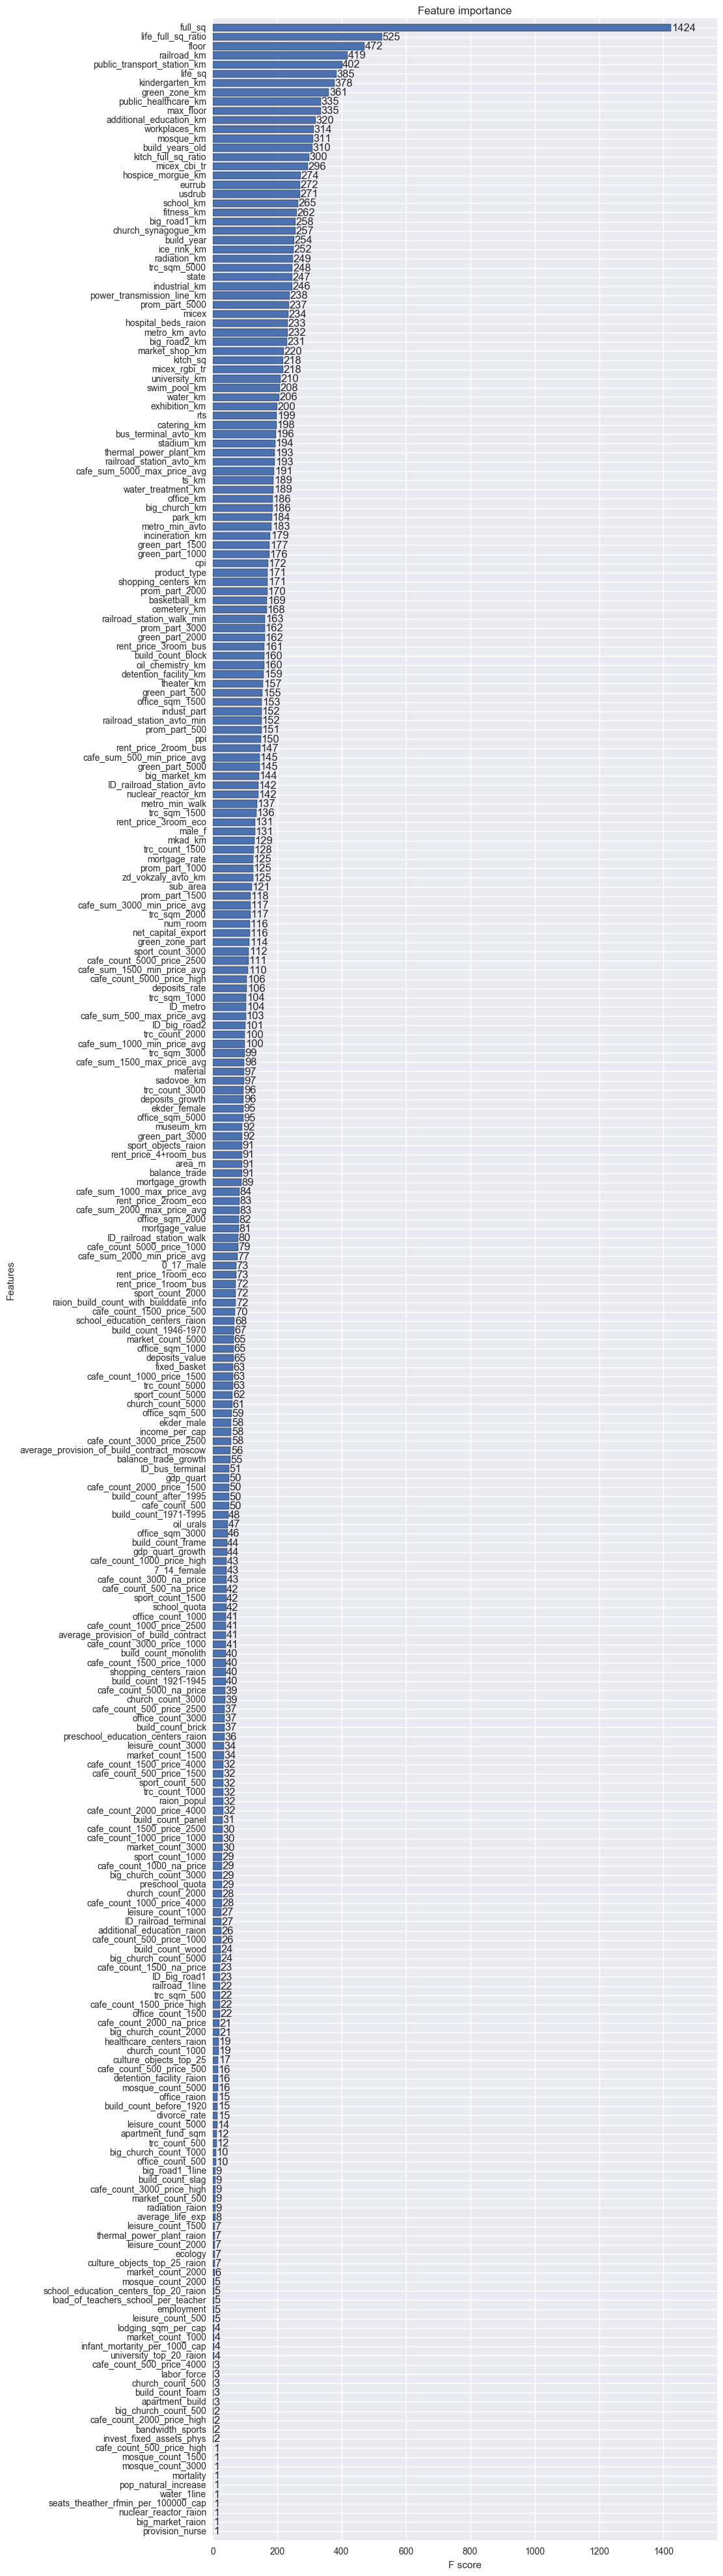

In [61]:
fig, ax = plt.subplots(figsize=(10,50))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()

<div style="text-align:justify"><span style="color:black; font-family:Times New Roman; font-size:1.5em;line-height:1.4em;"> Finally, the test data is predicted by using the trained model. The best prediction results of the test data achieved the ranking of top 26% in the Kaggle competition ‘Sberbank Russian Housing Market’.

        
 </span></div>

In [56]:
y_pred = model.predict(dtest)
y_pred = np.exp(y_pred) - 1
df=pd.DataFrame({'id': id_test, 'price_doc': y_pred})
df.to_csv('submission.csv', index=False)

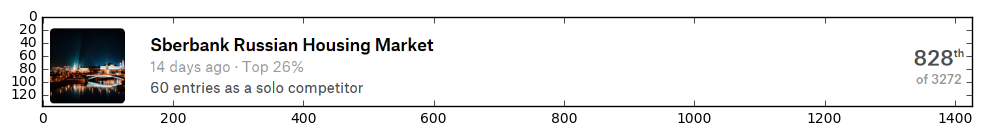

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax=plt.subplots(figsize=(12,12))

ax.imshow(plt.imread("fig.png"))

<div style="text-align:center"><span style="color:blue; font-family:Times New Roman; font-size:3em;"> Conclusion </span></div>

<div style="text-align:justify"><span style="color:black; font-family:Times New Roman; font-size:1.5em;line-height:1.4em;"> 
The dataset provided by this competition is very suitable for data exploration study. I am glad that through this project, I can work through most of data exploration techniques, such as missing value imputation, outlier detection and treatment, and multicollinearity treatment. I believe this experience will enhance my future performance on data analysis. 

        
 </span></div>